In [1]:
# imports
import cv2
import os  # to load the images from a folder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# useful functions
def convertBlackAndWhite(image):
    # normalize the image
    img_grey_norm = np.zeros(image.shape)
    
    # define a threshold
    final_thresh = np.mean(image)

    # threshold the image
    img_binary = cv2.threshold(image, final_thresh, 255, cv2.THRESH_BINARY)[1]
    
    return img_binary

def saveImage(image, folder, filename):
    # save image
    cv2.imwrite(os.path.join(folder,filename), image)

def getNumPixels(image):
    return np.sum(image >= 0)
    
def getNumBlackPixels(image):
    return np.sum(image == 0)

def getPercentage(image):
    return (getNumBlackPixels(image)/getNumPixels(image))*100

def imageIsCorrect(image):
    percentage = getPercentage(image)
    crop_image = image[256:,:]
    percentage_2 = getPercentage(crop_image)
    plt.imshow(crop_image)
    plt.show()
    correct = True
    if percentage < 54:
        if percentage_2 < 9 or percentage_2 > 37:
            correct = False
            print("Incorrect percentage_2: " + str(percentage_2))
        else:
            print("Correct percentage_2: " + str(percentage_2))
            
    return correct

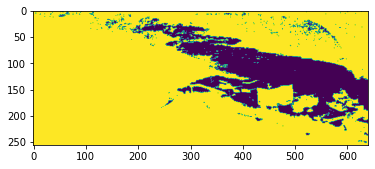

Correct percentage_2: 18.536376953125
Percentage: 51.38916015625
Image is correct


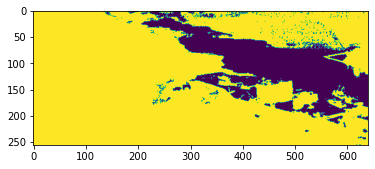

Correct percentage_2: 20.4443359375
Percentage: 51.8682861328125
Image is correct


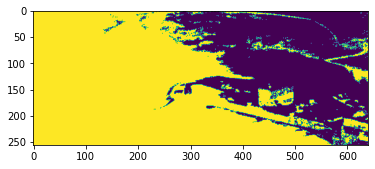

Percentage: 61.2030029296875
Image is correct


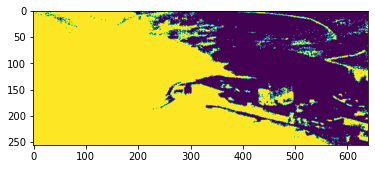

Percentage: 59.9212646484375
Image is correct


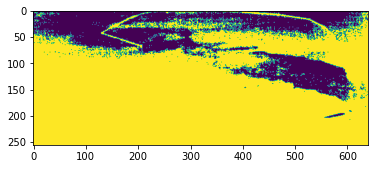

Percentage: 61.6552734375
Image is correct


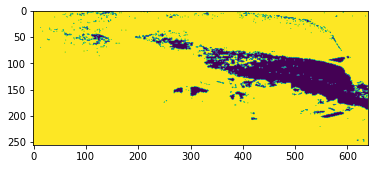

Correct percentage_2: 11.6033935546875
Percentage: 51.578369140625
Image is correct


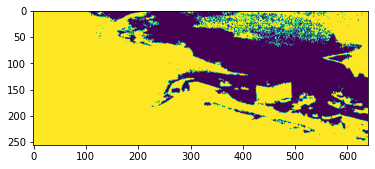

Percentage: 57.06085205078125
Image is correct


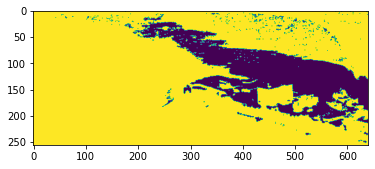

Correct percentage_2: 18.74755859375
Percentage: 51.1590576171875
Image is correct


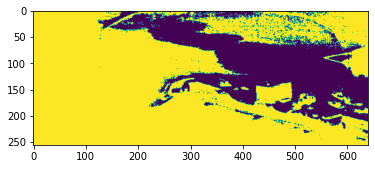

Percentage: 55.1422119140625
Image is correct


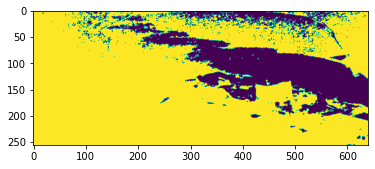

Percentage: 56.57867431640625
Image is correct


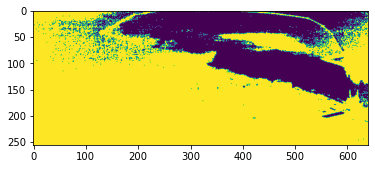

Percentage: 57.06665039062499
Image is correct


In [3]:
folder = 'Images'
folderSave = 'Save'
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        img_binary = convertBlackAndWhite(img)
        if (imageIsCorrect(img_binary)):
            print("Percentage: " + str(getPercentage(img_binary)))
            print("Image is correct")
            saveImage(img, folderSave, filename)
        else:
            print("Percentage: " + str(getPercentage(img_binary)))
            print("Image is not correct")